In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import sklearn
import joblib

In [2]:
# Loading the data set  from the clinet provided 
df1=pd.read_csv("laptop.csv")
# make a duplicate data frame for correction as well the get wrond instruction 
df=df1.copy()

In [3]:
# get the top 5 rows for checking and understand the data
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
#geting the last 5 rows for understaning the data
df.tail()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
1298,1298,1298.0,Lenovo,2 in 1 Convertible,14,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.8kg,33992.64
1299,1299,1299.0,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16GB,512GB SSD,Intel HD Graphics 520,Windows 10,1.3kg,79866.72
1300,1300,1300.0,Lenovo,Notebook,14,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2GB,64GB Flash Storage,Intel HD Graphics,Windows 10,1.5kg,12201.12
1301,1301,1301.0,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6GB,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19kg,40705.92
1302,1302,1302.0,Asus,Notebook,15.6,1366x768,Intel Celeron Dual Core N3050 1.6GHz,4GB,500GB HDD,Intel HD Graphics,Windows 10,2.2kg,19660.32


In [5]:
# finding the shape of the data it return the count of the rows and columns

df.shape

(1303, 13)

In [6]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [7]:
# delete the unwanted columns
# --// Unnamed: 0.1 , Unnamed: 0 i am assumeing these two are same and not use for me so i ma deleting the columns
df.drop(columns=["Unnamed: 0.1","Unnamed: 0"],inplace=True)

In [8]:
df.head()
# i ma checking the columns are deleted or not

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [9]:
# understand the coumns data
df["Company"].value_counts().count() # thse are the 2 methods to get hoe many nuique values we have

df["Company"].nunique()

19

In [10]:
df["TypeName"].value_counts()

TypeName
Notebook              710
Gaming                203
Ultrabook             191
2 in 1 Convertible    116
Workstation            29
Netbook                24
Name: count, dtype: int64

In [11]:
df["Cpu"].value_counts().sum()

np.int64(1273)

In [12]:
df["Ram"].value_counts()


Ram
8GB     601
4GB     367
16GB    194
6GB      40
12GB     25
2GB      22
32GB     17
64GB      3
24GB      3
1GB       1
Name: count, dtype: int64

In [13]:
df["Memory"].value_counts().sum()

np.int64(1273)

In [14]:
df["Gpu"].value_counts().count() # i have 110 values 


np.int64(110)

In [15]:
df["OpSys"].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [16]:
df["Weight"].value_counts()

Weight
2.2kg      111
2.1kg       57
2.4kg       43
2.3kg       41
2.5kg       37
          ... 
3.52kg       1
2.21kg       1
2.191kg      1
2.34kg       1
4.0kg        1
Name: count, Length: 189, dtype: int64

In [17]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [18]:
df["Price"]

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

In [19]:
# find there is null values or not
df.isnull().sum()

Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [21]:
obj=["Company","TypeName","Inches","ScreenResolution","Cpu","Ram","Memory","Gpu","Opsys"]

In [22]:

# i am filing the data where i have null values 
for i in df.select_dtypes(include="object").columns:
    df[i].fillna(df[i].mode()[0],inplace=True)

C:\Users\sowmya\AppData\Local\Temp\ipykernel_10796\3979724157.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0],inplace=True)


In [23]:
a=[]
for i in df.select_dtypes(include="number").columns:
    a.append(i)
# a = list(df.select_dtypes(include="number").columns)

<Axes: ylabel='Price'>

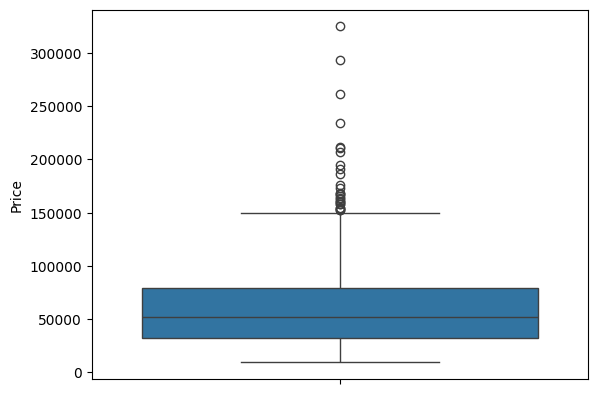

In [24]:
# find the out layers to fill the null values to choose the mean or median
sns.boxplot(df["Price"])

In [25]:
# i have the outlayers i so i am going to fill the null values in a meian value
med_pri=np.median(df["Price"])
med_pri

np.float64(nan)

In [26]:
# This shows how many NaN values are there
print(df["Price"].isna().sum())

30


In [27]:
df["Price"].fillna(df["Price"].median(), inplace=True)
# i am useing df["Price"].median() is a pandas Series method. This function is designed to work directly with pandas Series (columns in a DataFrame) and handles things like NaN values automatically by ignoring them.
#np.median() is a NumPy function. It works well with arrays (odf[lists) but does not automatically handle missing values (NaN). If you pass it an array with NaN values, it will return NaN.

In [28]:
df["Price"].isnull().sum()

np.int64(0)

In [29]:
df["Price"]

0        71378.6832
1        47895.5232
2        30636.0000
3       135195.3360
4        96095.8080
           ...     
1298     33992.6400
1299     79866.7200
1300     12201.1200
1301     40705.9200
1302     19660.3200
Name: Price, Length: 1303, dtype: float64

In [30]:
# rounding the number and converting to float to integers
df["Price"]=df["Price"].round().astype(int)
df["Price"].head(3)

0    71379
1    47896
2    30636
Name: Price, dtype: int64

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Company           1303 non-null   object
 1   TypeName          1303 non-null   object
 2   Inches            1303 non-null   object
 3   ScreenResolution  1303 non-null   object
 4   Cpu               1303 non-null   object
 5   Ram               1303 non-null   object
 6   Memory            1303 non-null   object
 7   Gpu               1303 non-null   object
 8   OpSys             1303 non-null   object
 9   Weight            1303 non-null   object
 10  Price             1303 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 112.1+ KB


In [32]:
# i am geting the in each columns contain ing unique values with a inbult functiomn
unique_counts = df.nunique()
unique_counts

Company              19
TypeName              6
Inches               25
ScreenResolution     40
Cpu                 118
Ram                  10
Memory               40
Gpu                 110
OpSys                 9
Weight              189
Price               765
dtype: int64

In [33]:
df["Inches"].replace("?", np.nan, inplace=True)

C:\Users\sowmya\AppData\Local\Temp\ipykernel_10796\2572666589.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Inches"].replace("?", np.nan, inplace=True)


In [34]:
df["Inches"]=df["Inches"].astype(float).round(0)

In [35]:
df["Inches"].isnull().sum()

np.int64(1)

In [36]:
df["Inches"].describe()

count    1302.000000
mean       15.268817
std         2.019108
min        10.000000
25%        14.000000
50%        16.000000
75%        16.000000
max        36.000000
Name: Inches, dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1302 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   object 
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   object 
 10  Price             1303 non-null   int64  
dtypes: float64(1), int64(1), object(9)
memory usage: 112.1+ KB


In [38]:
unique_counts

Company              19
TypeName              6
Inches               25
ScreenResolution     40
Cpu                 118
Ram                  10
Memory               40
Gpu                 110
OpSys                 9
Weight              189
Price               765
dtype: int64

In [39]:
df["Cpu"].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz       213
Intel Core i7 7700HQ 2.8GHz      142
Intel Core i7 7500U 2.7GHz       128
Intel Core i7 8550U 1.8GHz        72
Intel Core i5 8250U 1.6GHz        68
                                ... 
Intel Core i5 7200U 2.70GHz        1
Intel Core M M7-6Y75 1.2GHz        1
Intel Core M 6Y54 1.1GHz           1
AMD E-Series 9000 2.2GHz           1
Samsung Cortex A72&A53 2.0GHz      1
Name: count, Length: 118, dtype: int64

In [40]:
# Step 1: Remove 'kg' from the 'Weight' column
df['Weight'] = df['Weight'].str.replace('kg', '', regex=False)

# Step 2: Replace '?' with NaN
df['Weight'] = df['Weight'].replace('?', np.nan)

# Step 3: Convert the 'Weight' column to numeric (float)
df['Weight'] = pd.to_numeric(df['Weight'], errors='coerce')

# Step 4: Check if 'Weight' is numeric
print(df['Weight'].dtype)

# Step 5: Fill NaN values with the median
df['Weight'].fillna(df['Weight'].median(), inplace=True)



float64


C:\Users\sowmya\AppData\Local\Temp\ipykernel_10796\1029402827.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Weight'].fillna(df['Weight'].median(), inplace=True)


In [41]:
df["Weight"].isnull().sum()

np.int64(0)

In [42]:
# Categorize screen resolution
def categorize_resolution(row):
    if '4K' in row:
        return '4K'
    elif 'Full HD' in row or '1920x1080' in row:
        return 'Full HD'
    elif 'Retina' in row or '2560x1440' in row or '2304x1440' in row:
        return 'Retina'
    elif 'Quad HD' in row or '2560x1600' in row:
        return 'Quad HD'
    else:
        return 'Other'

df['ResolutionCategory'] = df['ScreenResolution'].apply(categorize_resolution)

# Check the new feature
print(df[['ScreenResolution', 'ResolutionCategory']].head())


                     ScreenResolution ResolutionCategory
0  IPS Panel Retina Display 2560x1600             Retina
1                            1440x900              Other
2                   Full HD 1920x1080            Full HD
3  IPS Panel Retina Display 2880x1800             Retina
4  IPS Panel Retina Display 2560x1600             Retina


In [43]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ResolutionCategory
0,Apple,Ultrabook,13.0,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379,Retina
1,Apple,Ultrabook,13.0,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896,Other
2,HP,Notebook,16.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636,Full HD
3,Apple,Ultrabook,15.0,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195,Retina
4,Apple,Ultrabook,13.0,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096,Retina


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1302 non-null   float64
 3   ScreenResolution    1303 non-null   object 
 4   Cpu                 1303 non-null   object 
 5   Ram                 1303 non-null   object 
 6   Memory              1303 non-null   object 
 7   Gpu                 1303 non-null   object 
 8   OpSys               1303 non-null   object 
 9   Weight              1303 non-null   float64
 10  Price               1303 non-null   int64  
 11  ResolutionCategory  1303 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [45]:
df["Weight"].describe()

count    1303.000000
mean        2.080422
std         0.798345
min         0.000200
25%         1.540000
50%         2.060000
75%         2.310000
max        11.100000
Name: Weight, dtype: float64

In [46]:
df["Weight"].value_counts()

Weight
2.200    146
2.100     57
2.400     43
2.000     42
2.300     41
        ... 
0.990      1
2.591      1
2.210      1
2.191      1
2.340      1
Name: count, Length: 180, dtype: int64

In [47]:
def detect_outliers(col):
    q1, q3 = np.percentile(col, [25, 75])  # 1st and 3rd quartile
    iqr = q3 - q1  # Interquartile range
    lower_bound = q1 - 1.5 * iqr  # Lower bound for outliers
    upper_bound = q3 + 1.5 * iqr  # Upper bound for outliers
    return lower_bound, upper_bound

# Select only numeric columns
numeric_columns = df.select_dtypes(include="number").columns

# Loop through numeric columns and handle NaN and outliers
for col in numeric_columns:
    # 1. Fill NaN values with the median
    median_value = df[col].median()
    df[col].fillna(median_value, inplace=True)
    
    # 2. Detect outliers and replace them with the median
    lower_bound, upper_bound = detect_outliers(df[col])
    df[col] = np.where(df[col] < lower_bound, median_value, df[col])  # Replace low outliers
    df[col] = np.where(df[col] > upper_bound, median_value, df[col])  # Replace high outliers

# Verify the changes
print(df.head())

  Company   TypeName  Inches                    ScreenResolution  \
0   Apple  Ultrabook    13.0  IPS Panel Retina Display 2560x1600   
1   Apple  Ultrabook    13.0                            1440x900   
2      HP   Notebook    16.0                   Full HD 1920x1080   
3   Apple  Ultrabook    15.0  IPS Panel Retina Display 2880x1800   
4   Apple  Ultrabook    13.0  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB            128GB SSD   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight     Price ResolutionCategory  
0  Intel Iris Plus Graphics 640  macOS    1.37   71379.0             Retina  
1        Intel HD Graphics 6000  macOS    1.34   47896.0              Othe

C:\Users\sowmya\AppData\Local\Temp\ipykernel_10796\611847621.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(median_value, inplace=True)
C:\Users\sowmya\AppData\Local\Temp\ipykernel_10796\611847621.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example

In [48]:
df.drop(columns=["ScreenResolution"],inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   Cpu                 1303 non-null   object 
 4   Ram                 1303 non-null   object 
 5   Memory              1303 non-null   object 
 6   Gpu                 1303 non-null   object 
 7   OpSys               1303 non-null   object 
 8   Weight              1303 non-null   float64
 9   Price               1303 non-null   float64
 10  ResolutionCategory  1303 non-null   object 
dtypes: float64(3), object(8)
memory usage: 112.1+ KB


<Axes: ylabel='Inches'>

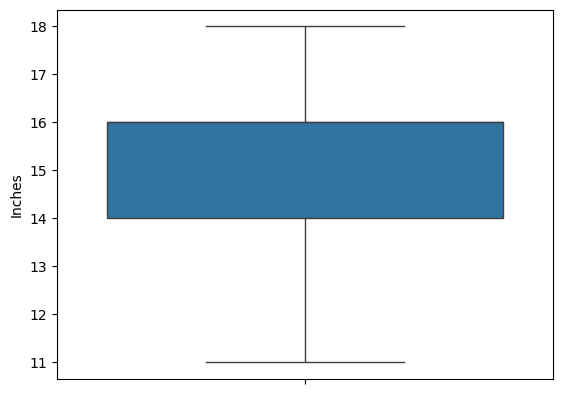

In [50]:
sns.boxplot(df["Inches"])

<Axes: ylabel='Weight'>

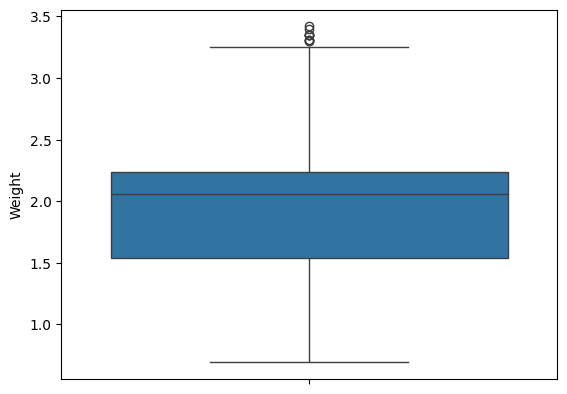

In [51]:
sns.boxplot(df["Weight"])

<Axes: ylabel='Price'>

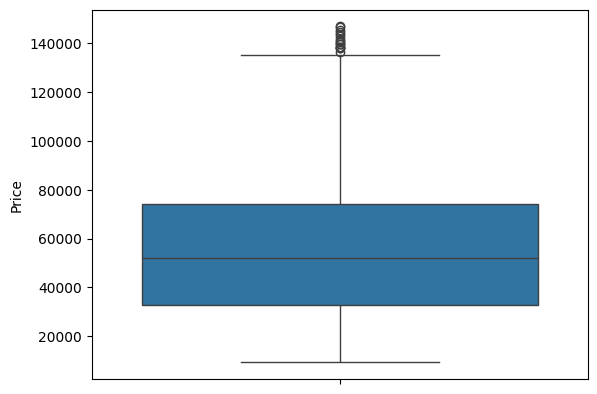

In [52]:
sns.boxplot(df["Price"])

In [53]:
df["Inches"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1303 entries, 0 to 1302
Series name: Inches
Non-Null Count  Dtype  
--------------  -----  
1303 non-null   float64
dtypes: float64(1)
memory usage: 10.3 KB


In [54]:
df["OpSys"].value_counts()

OpSys
Windows 10      1077
No OS             63
Linux             61
Windows 7         45
Chrome OS         27
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   Cpu                 1303 non-null   object 
 4   Ram                 1303 non-null   object 
 5   Memory              1303 non-null   object 
 6   Gpu                 1303 non-null   object 
 7   OpSys               1303 non-null   object 
 8   Weight              1303 non-null   float64
 9   Price               1303 non-null   float64
 10  ResolutionCategory  1303 non-null   object 
dtypes: float64(3), object(8)
memory usage: 112.1+ KB


In [56]:
# Function to clean duplicate storage values
def clean_storage(storage_value):
    if isinstance(storage_value, str):
        # If the value is "?", replace it with None or a placeholder value
        if storage_value == '?':
            return None  # You can replace None with 'Unknown' or any other value if needed
        
        # Split the string by ' + '
        parts = storage_value.split(' + ')
        
        # Remove duplicates using a set, then join them back
        cleaned_parts = ' + '.join(sorted(set(parts), key=parts.index))
        
        return cleaned_parts
    else:
        return storage_value  # Return as is if it's not a string (handle any non-string values)

# Apply the function to the 'Memory' column to clean it permanently
df['Memory'] = df['Memory'].apply(clean_storage)

# Check the cleaned 'Memory' column to confirm the changes
print(df['Memory'].head(20))



0               128GB SSD
1     128GB Flash Storage
2               256GB SSD
3               512GB SSD
4               256GB SSD
5               500GB HDD
6     256GB Flash Storage
7     256GB Flash Storage
8               512GB SSD
9               256GB SSD
10              500GB HDD
11              500GB HDD
12              256GB SSD
13              256GB SSD
14              256GB SSD
15              256GB SSD
16              256GB SSD
17              512GB SSD
18                1TB HDD
19              128GB SSD
Name: Memory, dtype: object


In [57]:
df["Memory"].nunique()

39

In [58]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ResolutionCategory
0,Apple,Ultrabook,13.0,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379.0,Retina
1,Apple,Ultrabook,13.0,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896.0,Other
2,HP,Notebook,16.0,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0,Full HD
3,Apple,Ultrabook,15.0,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.0,Retina
4,Apple,Ultrabook,13.0,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096.0,Retina


In [59]:
df["Cpu"].unique()

array(['Intel Core i5 2.3GHz', 'Intel Core i5 1.8GHz',
       'Intel Core i5 7200U 2.5GHz', 'Intel Core i7 2.7GHz',
       'Intel Core i5 3.1GHz', 'AMD A9-Series 9420 3GHz',
       'Intel Core i7 2.2GHz', 'Intel Core i7 8550U 1.8GHz',
       'Intel Core i5 8250U 1.6GHz', 'Intel Core i3 6006U 2GHz',
       'Intel Core i7 2.8GHz', 'Intel Core M m3 1.2GHz',
       'Intel Core i7 7500U 2.7GHz', 'Intel Core i7 2.9GHz',
       'Intel Core i3 7100U 2.4GHz', 'Intel Core i5 7300HQ 2.5GHz',
       'AMD E-Series E2-9000e 1.5GHz', 'Intel Core i5 1.6GHz',
       'Intel Core i7 8650U 1.9GHz', 'Intel Atom x5-Z8300 1.44GHz',
       'AMD E-Series E2-6110 1.5GHz', 'AMD A6-Series 9220 2.5GHz',
       'Intel Celeron Dual Core N3350 1.1GHz',
       'Intel Core i3 7130U 2.7GHz', 'Intel Core i7 7700HQ 2.8GHz',
       'Intel Core i5 2.0GHz', 'AMD Ryzen 1700 3GHz',
       'Intel Pentium Quad Core N4200 1.1GHz',
       'Intel Celeron Dual Core N3060 1.6GHz', 'Intel Core i5 1.3GHz',
       'AMD FX 9830P 3GHz', '

In [60]:
# Step 1: Extract clock speed (in GHz) and store it as a new numeric column
df['Clock_Speed'] = df['Cpu'].str.extract(r'(\d+\.\d+)').astype(float)

# Step 2: Extract CPU brand/model (e.g., 'Intel', 'AMD') as a new column
df['CPU_Brand'] = df['Cpu'].str.extract(r'([A-Za-z]+)').apply(lambda x: x.capitalize() if isinstance(x, str) else x)

# Verify the new columns
print(df[['Cpu', 'Clock_Speed', 'CPU_Brand']])

                                       Cpu  Clock_Speed CPU_Brand
0                     Intel Core i5 2.3GHz          2.3     Intel
1                     Intel Core i5 1.8GHz          1.8     Intel
2               Intel Core i5 7200U 2.5GHz          2.5     Intel
3                     Intel Core i7 2.7GHz          2.7     Intel
4                     Intel Core i5 3.1GHz          3.1     Intel
...                                    ...          ...       ...
1298            Intel Core i7 6500U 2.5GHz          2.5     Intel
1299            Intel Core i7 6500U 2.5GHz          2.5     Intel
1300  Intel Celeron Dual Core N3050 1.6GHz          1.6     Intel
1301            Intel Core i7 6500U 2.5GHz          2.5     Intel
1302  Intel Celeron Dual Core N3050 1.6GHz          1.6     Intel

[1303 rows x 3 columns]


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   Cpu                 1303 non-null   object 
 4   Ram                 1303 non-null   object 
 5   Memory              1302 non-null   object 
 6   Gpu                 1303 non-null   object 
 7   OpSys               1303 non-null   object 
 8   Weight              1303 non-null   float64
 9   Price               1303 non-null   float64
 10  ResolutionCategory  1303 non-null   object 
 11  Clock_Speed         1219 non-null   float64
 12  CPU_Brand           1303 non-null   object 
dtypes: float64(4), object(9)
memory usage: 132.5+ KB


In [62]:
df['CPU_Brand'].value_counts()

CPU_Brand
Intel      1240
AMD          62
Samsung       1
Name: count, dtype: int64

In [63]:
# Step 1: Extract the CPU type (e.g., i3, i5, i7, A9-Series, Ryzen)
df['CPU_Type'] = df['Cpu'].str.extract(r'([iA]\d{1,2}|Ryzen|Xeon)', expand=False)

# Optional: You can standardize the CPU types to a simpler form (e.g., i5, i7, A9, etc.)
df['CPU_Type'] = df['CPU_Type'].apply(lambda x: x.upper() if isinstance(x, str) else x)

# Verify the new columns
print(df[['Cpu', 'CPU_Type']])

                                       Cpu CPU_Type
0                     Intel Core i5 2.3GHz       I5
1                     Intel Core i5 1.8GHz       I5
2               Intel Core i5 7200U 2.5GHz       I5
3                     Intel Core i7 2.7GHz       I7
4                     Intel Core i5 3.1GHz       I5
...                                    ...      ...
1298            Intel Core i7 6500U 2.5GHz       I7
1299            Intel Core i7 6500U 2.5GHz       I7
1300  Intel Celeron Dual Core N3050 1.6GHz      NaN
1301            Intel Core i7 6500U 2.5GHz       I7
1302  Intel Celeron Dual Core N3050 1.6GHz      NaN

[1303 rows x 2 columns]


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   Cpu                 1303 non-null   object 
 4   Ram                 1303 non-null   object 
 5   Memory              1302 non-null   object 
 6   Gpu                 1303 non-null   object 
 7   OpSys               1303 non-null   object 
 8   Weight              1303 non-null   float64
 9   Price               1303 non-null   float64
 10  ResolutionCategory  1303 non-null   object 
 11  Clock_Speed         1219 non-null   float64
 12  CPU_Brand           1303 non-null   object 
 13  CPU_Type            1145 non-null   object 
dtypes: float64(4), object(10)
memory usage: 142.6+ KB


In [65]:
df["CPU_Type"].value_counts().count()

np.int64(12)

In [66]:
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,ResolutionCategory,Clock_Speed,CPU_Brand,CPU_Type
0,Apple,Ultrabook,13.0,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379.0,Retina,2.3,Intel,I5
1,Apple,Ultrabook,13.0,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896.0,Other,1.8,Intel,I5
2,HP,Notebook,16.0,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0,Full HD,2.5,Intel,I5
3,Apple,Ultrabook,15.0,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.0,Retina,2.7,Intel,I7
4,Apple,Ultrabook,13.0,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096.0,Retina,3.1,Intel,I5


In [67]:
df.drop(columns=["Cpu"],inplace=True)

In [68]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,ResolutionCategory,Clock_Speed,CPU_Brand,CPU_Type
0,Apple,Ultrabook,13.0,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71379.0,Retina,2.3,Intel,I5
1,Apple,Ultrabook,13.0,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47896.0,Other,1.8,Intel,I5
2,HP,Notebook,16.0,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0,Full HD,2.5,Intel,I5
3,Apple,Ultrabook,15.0,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.0,Retina,2.7,Intel,I7
4,Apple,Ultrabook,13.0,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96096.0,Retina,3.1,Intel,I5


In [69]:
df["Memory"].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '128GB SSD +  1TB HDD', '256GB SSD +  256GB SSD',
       '64GB Flash Storage', '32GB Flash Storage', '256GB SSD +  1TB HDD',
       '256GB SSD +  2TB HDD', '32GB SSD', '2TB HDD', '64GB SSD',
       '1.0TB Hybrid', '512GB SSD +  1TB HDD', '1TB SSD',
       '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', None, '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [70]:
df.isnull().sum()

Company                 0
TypeName                0
Inches                  0
Ram                     0
Memory                  1
Gpu                     0
OpSys                   0
Weight                  0
Price                   0
ResolutionCategory      0
Clock_Speed            84
CPU_Brand               0
CPU_Type              158
dtype: int64

In [71]:
# Step 1: Remove everything after the "+" sign (if exists)
df['Memory'] = df['Memory'].str.split(' +').str[0]


In [72]:
df.head()

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,Price,ResolutionCategory,Clock_Speed,CPU_Brand,CPU_Type
0,Apple,Ultrabook,13.0,8GB,128GB,Intel Iris Plus Graphics 640,macOS,1.37,71379.0,Retina,2.3,Intel,I5
1,Apple,Ultrabook,13.0,8GB,128GB,Intel HD Graphics 6000,macOS,1.34,47896.0,Other,1.8,Intel,I5
2,HP,Notebook,16.0,8GB,256GB,Intel HD Graphics 620,No OS,1.86,30636.0,Full HD,2.5,Intel,I5
3,Apple,Ultrabook,15.0,16GB,512GB,AMD Radeon Pro 455,macOS,1.83,135195.0,Retina,2.7,Intel,I7
4,Apple,Ultrabook,13.0,8GB,256GB,Intel Iris Plus Graphics 650,macOS,1.37,96096.0,Retina,3.1,Intel,I5


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   Ram                 1303 non-null   object 
 4   Memory              1302 non-null   object 
 5   Gpu                 1303 non-null   object 
 6   OpSys               1303 non-null   object 
 7   Weight              1303 non-null   float64
 8   Price               1303 non-null   float64
 9   ResolutionCategory  1303 non-null   object 
 10  Clock_Speed         1219 non-null   float64
 11  CPU_Brand           1303 non-null   object 
 12  CPU_Type            1145 non-null   object 
dtypes: float64(4), object(9)
memory usage: 132.5+ KB


<Axes: ylabel='Clock_Speed'>

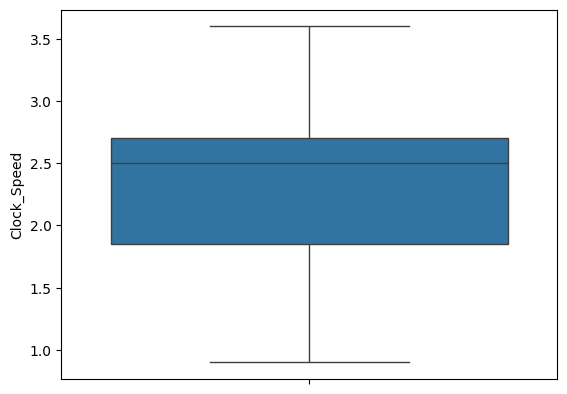

In [74]:
sns.boxplot(df["Clock_Speed"])

In [75]:
clk_mean=df["Clock_Speed"].mean()
clk_mean

np.float64(2.308876127973749)

In [76]:
# Define the value you want to replace NaN with
replacement_value = np.float64(2.308876127973749)

# Replace NaN values in the DataFrame with the specified value
df.fillna(replacement_value, inplace=True)


In [77]:
df["Clock_Speed"].isnull().sum()

np.int64(0)

In [78]:
df["CPU_Brand"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1303 entries, 0 to 1302
Series name: CPU_Brand
Non-Null Count  Dtype 
--------------  ----- 
1303 non-null   object
dtypes: object(1)
memory usage: 10.3+ KB


In [79]:
mode_cb=df["CPU_Brand"].mode()[0]
mode_cb
df["CPU_Brand"].fillna(mode_cb,inplace=True)

C:\Users\sowmya\AppData\Local\Temp\ipykernel_10796\2551696987.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["CPU_Brand"].fillna(mode_cb,inplace=True)


In [80]:
df['CPU_Brand'].isnull().sum()

np.int64(0)

In [81]:
mode_mem=df["Memory"].mode()[0]
mode_mem
df["Memory"].fillna(mode_mem,inplace=True)

C:\Users\sowmya\AppData\Local\Temp\ipykernel_10796\634546993.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Memory"].fillna(mode_mem,inplace=True)


In [82]:
df.isnull().sum()

Company               0
TypeName              0
Inches                0
Ram                   0
Memory                0
Gpu                   0
OpSys                 0
Weight                0
Price                 0
ResolutionCategory    0
Clock_Speed           0
CPU_Brand             0
CPU_Type              0
dtype: int64

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   object 
 1   TypeName            1303 non-null   object 
 2   Inches              1303 non-null   float64
 3   Ram                 1303 non-null   object 
 4   Memory              1303 non-null   object 
 5   Gpu                 1303 non-null   object 
 6   OpSys               1303 non-null   object 
 7   Weight              1303 non-null   float64
 8   Price               1303 non-null   float64
 9   ResolutionCategory  1303 non-null   object 
 10  Clock_Speed         1303 non-null   float64
 11  CPU_Brand           1303 non-null   object 
 12  CPU_Type            1303 non-null   object 
dtypes: float64(4), object(9)
memory usage: 132.5+ KB


In [84]:
df.isnull().sum()

Company               0
TypeName              0
Inches                0
Ram                   0
Memory                0
Gpu                   0
OpSys                 0
Weight                0
Price                 0
ResolutionCategory    0
Clock_Speed           0
CPU_Brand             0
CPU_Type              0
dtype: int64

In [86]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])

In [87]:
# Step 2: Handle missing or mixed type columns
# Convert numeric columns to strings (if necessary) or fill missing values
for column in df.select_dtypes(include='object').columns:
    # Fill NaN with a placeholder string (optional, you can choose another method if necessary)
    df[column] = df[column].fillna('Missing')

# If you still have a mix of numeric and string types, we can convert all values to strings
for column in df.select_dtypes(include='object').columns:
    df[column] = df[column].astype(str)

# Step 3: Apply LabelEncoder to the cleaned columns
le = LabelEncoder()
for column in df.select_dtypes(include='object').columns:
    df[column] = le.fit_transform(df[column])

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   int64  
 1   TypeName            1303 non-null   int64  
 2   Inches              1303 non-null   float64
 3   Ram                 1303 non-null   int64  
 4   Memory              1303 non-null   int64  
 5   Gpu                 1303 non-null   int64  
 6   OpSys               1303 non-null   int64  
 7   Weight              1303 non-null   float64
 8   Price               1303 non-null   float64
 9   ResolutionCategory  1303 non-null   int64  
 10  Clock_Speed         1303 non-null   float64
 11  CPU_Brand           1303 non-null   int64  
 12  CPU_Type            1303 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 132.5 KB


In [89]:
x=df.drop(columns="Price")
y=df["Price"]

In [90]:
# form now i want to prepare a model
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split( x, y ,test_size=0.2,random_state=42)

In [91]:
x_train

,Company,TypeName,Inches,Ram,Memory,Gpu,OpSys,Weight,ResolutionCategory,Clock_Speed,CPU_Brand,CPU_Type
10,7,3,16.0,6,10,53,4,1.86,2,2.50,1,9
147,2,3,16.0,6,4,43,5,2.00,1,1.10,1,0
1287,7,3,16.0,8,4,21,5,2.19,2,2.50,1,10
767,4,1,16.0,1,1,89,5,2.72,0,2.60,1,10
816,14,4,12.0,1,12,53,5,1.29,0,2.50,1,10
...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0,3,16.0,9,7,86,5,2.40,1,2.50,1,9
1130,7,3,16.0,9,8,53,5,2.04,2,2.70,1,10
1294,7,3,16.0,8,0,29,5,2.04,1,2.90,0,7
860,10,3,16.0,9,4,53,5,2.30,1,2.50,1,9


In [92]:
y_test

479      89084.0
1022     61219.0
298      26587.0
1265     47899.0
774      52161.0
          ...   
1058     69211.0
199      55678.0
297      52161.0
411     103523.0
710      66547.0
Name: Price, Length: 261, dtype: float64

In [93]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [94]:
y_predlr=lr.predict(x_test)

In [95]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_predlr)

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_predlr)

# Print the results
print("Mean Squared Error:", mse)
print("R² Score:", r2)


Mean Squared Error: 375517248.37880397
R² Score: 0.5253881552418854


In [96]:
# i am now improve the model perfomence through cros validation 
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np

# Initialize your model
lr = LinearRegression()

# Apply cross-validation with 5 folds (you can change k if needed)
cv_scores = cross_val_score(lr, x, y, cv=5, scoring='neg_mean_squared_error')

# Convert negative MSE to positive (scikit-learn returns negative MSE by default)
cv_scores = np.abs(cv_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_cv_score = np.mean(cv_scores)
std_cv_score = np.std(cv_scores)

print(f"Cross-Validation Mean Squared Error (MSE): {mean_cv_score}")
print(f"Cross-Validation Standard Deviation (MSE): {std_cv_score}")


Cross-Validation Mean Squared Error (MSE): 486742839.5867945
Cross-Validation Standard Deviation (MSE): 21236830.721706923


In [97]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression

# Initialize the model
lr = LinearRegression()

# Perform cross-validation
cv_results = cross_validate(lr, x, y, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

# Calculate the mean test and train scores
mean_test_score = np.mean(np.abs(cv_results['test_score']))
mean_train_score = np.mean(np.abs(cv_results['train_score']))

print(f"Mean Test Score (MSE): {mean_test_score}")
print(f"Mean Train Score (MSE): {mean_train_score}")


Mean Test Score (MSE): 486742839.5867945
Mean Train Score (MSE): 455247616.7931445


In [98]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Normalize the features manually
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# Initialize the model
lr = LinearRegression()

# Define the hyperparameters to search over
param_grid = {
    'fit_intercept': [True, False]
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring='neg_mean_squared_error')

# Fit GridSearchCV to the scaled data
grid_search.fit(x_scaled, y)

# Print the best parameters and the corresponding score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best Cross-Validation Score (MSE): {np.abs(grid_search.best_score_)}")


Best Hyperparameters: {'fit_intercept': True}
Best Cross-Validation Score (MSE): 486742839.5867945


In [99]:
# now going to knn 
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
kmn=knn.fit(x_train,y_train)

In [100]:
y_predknn=knn.predict(x_test)

In [101]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(y_test,y_predknn)
mse
rmse=np.sqrt(mse)
rmse
r2=r2_score(y_test,y_predknn)
r2

0.642877033943325

In [102]:
#decission tree
from sklearn.tree import DecisionTreeRegressor
dt=DecisionTreeRegressor()
dt.fit(x_train , y_train)



DecisionTreeRegressor()

In [103]:
y_preddt=dt.predict(x_test)

In [104]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(y_test,y_preddt)
mse
rmse=np.sqrt(mse)
rmse
r2=r2_score(y_test,y_preddt)
r2

0.6834708214793114

In [105]:
# random forst 
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

In [106]:
y_predrf=dt.predict(x_test)

In [107]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(y_test,y_predrf)
mse
rmse=np.sqrt(mse)
rmse
r2=r2_score(y_test,y_predrf)
r2

0.6834708214793114

In [108]:
# xgboost
from xgboost import XGBRegressor
xgb=XGBRegressor()
xgb.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [109]:
y_predxgb= xgb.predict(x_test)

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(y_test,y_predxgb)
mse
rmse=np.sqrt(mse)
rmse
r2=r2_score(y_test,y_predxgb)
r2

0.8266964429794971

In [111]:
#support vector 
from sklearn.svm import SVR
svr=SVR()
svr.fit(x_train,y_train)

SVR()

In [112]:
y_predsvr=svr.predict(x_test)

In [113]:
from sklearn.metrics import mean_squared_error, r2_score
mse= mean_squared_error(y_test,y_predsvr)
mse
rmse=np.sqrt(mse)
rmse


np.float64(28221.86282241113)

In [114]:
# i get good mse at XGBoost so iam make my app with xgboost
import joblib

In [115]:
joblib.dump(xgb,"laptop.pkl")

['laptop.pkl']

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Company             1303 non-null   int64  
 1   TypeName            1303 non-null   int64  
 2   Inches              1303 non-null   float64
 3   Ram                 1303 non-null   int64  
 4   Memory              1303 non-null   int64  
 5   Gpu                 1303 non-null   int64  
 6   OpSys               1303 non-null   int64  
 7   Weight              1303 non-null   float64
 8   Price               1303 non-null   float64
 9   ResolutionCategory  1303 non-null   int64  
 10  Clock_Speed         1303 non-null   float64
 11  CPU_Brand           1303 non-null   int64  
 12  CPU_Type            1303 non-null   int64  
dtypes: float64(4), int64(9)
memory usage: 132.5 KB


In [117]:
df["ResolutionCategory"].value_counts()

ResolutionCategory
1    857
2    340
0     42
4     38
3     26
Name: count, dtype: int64

In [118]:
for i in df["Gpu"]:
    print(i)

58
51
53
9
59
17
60
51
98
61
53
47
10
24
52
58
24
11
72
61
53
75
12
61
53
47
51
7
61
69
40
12
7
61
51
43
53
7
53
70
53
79
72
61
63
56
53
37
24
66
53
98
16
61
53
6
47
53
80
47
7
61
53
61
53
76
6
41
53
76
53
7
7
75
47
75
53
61
97
69
61
52
53
5
17
76
85
53
79
61
36
98
61
79
53
61
24
24
65
75
7
12
6
98
53
72
47
72
76
53
98
58
53
61
61
53
61
72
66
72
53
80
72
70
17
53
61
12
7
61
30
24
61
97
53
61
43
75
66
53
97
35
77
47
16
61
46
43
53
47
75
75
53
79
53
6
53
53
61
47
22
98
6
76
43
79
44
75
98
61
53
6
16
53
69
53
47
62
4
61
7
61
61
53
98
63
75
75
52
7
53
43
98
98
61
69
82
61
75
70
79
47
72
79
101
79
53
61
61
53
75
75
47
53
53
7
85
69
61
61
6
61
47
61
79
72
30
67
86
1
53
12
79
53
47
30
47
24
82
75
47
63
86
75
53
7
53
82
61
59
61
93
22
61
97
61
16
98
80
77
7
47
53
53
24
61
61
53
70
61
57
37
6
47
68
53
7
97
47
98
72
24
75
53
98
53
55
72
76
72
40
75
47
75
61
79
76
101
18
72
53
80
84
72
76
44
53
68
72
47
53
61
80
17
43
7
61
45
53
42
53
66
53
61
34
43
53
72
53
75
76
53
53
47
75
53
53
53
43
72
40
7


In [119]:
df1["Gpu"].unique()

array(['Intel Iris Plus Graphics 640', 'Intel HD Graphics 6000',
       'Intel HD Graphics 620', 'AMD Radeon Pro 455',
       'Intel Iris Plus Graphics 650', 'AMD Radeon R5',
       'Intel Iris Pro Graphics', 'Nvidia GeForce MX150',
       'Intel UHD Graphics 620', 'Intel HD Graphics 520',
       'AMD Radeon Pro 555', 'AMD Radeon R5 M430',
       'Intel HD Graphics 615', 'AMD Radeon Pro 560',
       'Nvidia GeForce 940MX', nan, 'Nvidia GeForce GTX 1050',
       'AMD Radeon R2', 'AMD Radeon 530', 'Nvidia GeForce 930MX',
       'Intel HD Graphics', 'Intel HD Graphics 500',
       'Nvidia GeForce 930MX ', 'Nvidia GeForce GTX 1060',
       'Nvidia GeForce 150MX', 'Intel Iris Graphics 540',
       'AMD Radeon RX 580', 'Nvidia GeForce 920MX',
       'AMD Radeon R4 Graphics', 'AMD Radeon 520',
       'Nvidia GeForce GTX 1070', 'Nvidia GeForce GTX 1050 Ti',
       'Intel HD Graphics 400', 'Nvidia GeForce MX130', 'AMD R4 Graphics',
       'Nvidia GeForce GTX 940MX', 'AMD Radeon RX 560',
       

In [120]:
df.columns

Index(['Company', 'TypeName', 'Inches', 'Ram', 'Memory', 'Gpu', 'OpSys',
       'Weight', 'Price', 'ResolutionCategory', 'Clock_Speed', 'CPU_Brand',
       'CPU_Type'],
      dtype='object')

In [121]:
df["OpSys"].unique()

array([8, 4, 5, 3, 2, 6, 1, 7, 0])